In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df['Species']=df['Species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [21]:
scaler =StandardScaler()
df_scaled =scaler.fit_transform(df)

In [22]:
wcss=[]

In [23]:
for i in range(1,11):
    kmeans =KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

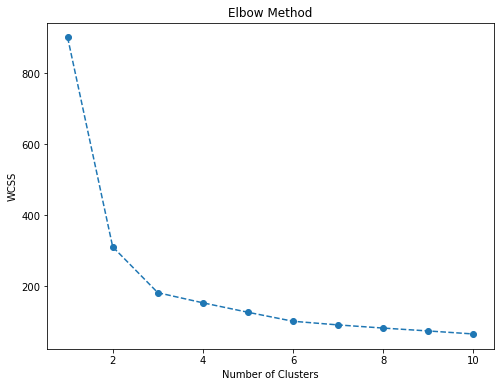

In [25]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=0)

In [28]:
df['Cluster']=kmeans.labels_

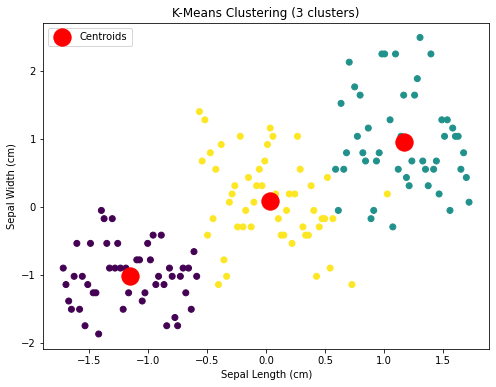

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=kmeans.labels_,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:, 1],s=300,c='red',label='Centroids')
plt.title('K-Means Clustering (3 clusters)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()